In [ ]:
''''Q2 – Could you explain to me how we can use a CNN-LSTM hybrid algo
for detecting abusive language on the Social Web. So I can see the quality of your code
a FB, Instagram connector (image, text and image-related comments) that collects
comments in French, Arabic on the subject of the death of the Tunisian president.
Text and image should be stored in a Mongodb database.'''

In [118]:
# Q2answer:
import nltk
import numpy as np
import random
import string # to process standard python strings
#example of raw data from web comments in fb .
f=open('C:/Users/rzouga/Desktop/CV+diplome/job opr/rawcomments.txt','r',errors = 'ignore') 

raw=f.read()
raw

'[\n  \n\n    \'THIS IS AN EXELLENT PRESIDENT   @@@@\',\n\n    \'The president was fantastic I like it!!!!!!\',\n\n    \'You should watch  his death it was  brilliant\',\n\n    \'Exceptionally good and honorable ---\',\n\n    \'Wonderfully directed and executed I like it@@\',\n\n    \'Its a fantastic president\',\n\n    \'Never watched such a brillent president\',\n\n    \'It is a Wonderful president\',\n\n    "horrible acting president", \n\n    \'waste of money ,\n\n     \' this president is a thief \',\n\n    \'pathetic president\', \n\n    \'It was very boring president\',\n\n    \'I did not like the president\',\n\n    \'The president was horrible  and bad \',\n\n    \'I will not recommend you this president\',\n\n    \'The president is pathetic\'\n]'

In [119]:
raw=raw.lower()# converts to lowercas
sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
sent_tokens

["[\n  \n\n    'this is an exellent president   @@@@',\n\n    'the president was fantastic i like it!!!!!!",
 '\',\n\n    \'you should watch  his death it was  brilliant\',\n\n    \'exceptionally good and honorable ---\',\n\n    \'wonderfully directed and executed i like it@@\',\n\n    \'its a fantastic president\',\n\n    \'never watched such a brillent president\',\n\n    \'it is a wonderful president\',\n\n    "horrible acting president", \n\n    \'waste of money ,\n\n     \' this president is a thief \',\n\n    \'pathetic president\', \n\n    \'it was very boring president\',\n\n    \'i did not like the president\',\n\n    \'the president was horrible  and bad \',\n\n    \'i will not recommend you this president\',\n\n    \'the president is pathetic\'\n]']

In [120]:
#1-preporcess of our text 
import numpy as np
import re

import matplotlib.pyplot as plt
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence
corpus=[]
for sen in sent_tokens:
    corpus.append(preprocess_text(sen))
    
nltk.download('wordnet') # first-time use only
lemmer = nltk.stem.WordNetLemmatizer()
#WordNet is a semantically-oriented dictionary of English included in NLTK.
def LemTokens(tokens):
    return [lemmer.lemmatize(token) for token in tokens]
corpus=LemTokens(corpus)
corpus

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rzouga\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


[' this is an exellent president the president was fantastic like it ',
 ' you should watch his death it was brilliant exceptionally good and honorable wonderfully directed and executed like it its fantastic president never watched such brillent president it is wonderful president horrible acting president waste of money this president is thief pathetic president it was very boring president did not like the president the president was horrible and bad will not recommend you this president the president is pathetic ']

In [121]:
#model cnn+lstmrnn 
from numpy import array
from tensorflow.keras import backend
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
layers = tf.keras.layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
# i take this example to train it  max leng sentence=8
corpus = [
    # Positive comment:positive language about the death of the Tunisian president.

    'This is an excellent president ',
    'The president was fantastic I like it',
    'You should watch  his death it was  brilliant',
    'Exceptionally good and honorable ',
    'Wonderfully directed and executed I like it',
    'Its a fantastic president',
    'Never watched such a brillent president',
    'It is a Wonderful president',
     'beji like helping people',
    'beji sebsi love all of us ',
    

    # Negtive comment :abusive language about the death of the Tunisian president.

    "horrible acting president",
    'waste of money , this president is a thief ',
    'pathetic president',
    'It was very boring president',
    'I did not like the president',
    'The president was horrible  and bad ',
    'I will not recommend you this president',
    'The president is pathetic',
    'baji sebsi is so bad',
    'baji sebsi stole the money',
   
]
#labels :0==> abusive/negative comments , 1==>normal/positive comments 
Abusive_comments_labels= array([1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0])


In [122]:
# preporess for model 
from nltk.tokenize import word_tokenize

all_words = []
for sent in corpus:
    tokenize_word = word_tokenize(sent)
    for word in tokenize_word:
        all_words.append(word)
        unique_words = set(all_words)
print(len(unique_words))


60


In [123]:
#embeded sentences 
from keras.preprocessing.text import Tokenizer
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index) + 1
embedded_sentences = word_tokenizer.texts_to_sequences(corpus)
print(embedded_sentences)

[[9, 2, 22, 23, 1], [3, 1, 5, 12, 6, 7, 4], [13, 24, 25, 26, 27, 4, 5, 28], [29, 30, 10, 31], [32, 33, 10, 34, 6, 7, 4], [35, 8, 12, 1], [36, 37, 38, 8, 39, 1], [4, 2, 8, 40, 1], [14, 7, 41, 42], [14, 11, 43, 44, 15, 45], [16, 46, 1], [47, 15, 17, 9, 1, 2, 8, 48], [18, 1], [4, 5, 49, 50, 1], [6, 51, 19, 7, 3, 1], [3, 1, 5, 16, 10, 20], [6, 52, 19, 53, 13, 9, 1], [3, 1, 2, 18], [21, 11, 2, 54, 20], [21, 11, 55, 3, 17]]


In [124]:
#padded sentences 
from nltk.tokenize import word_tokenize

word_count = lambda sentence: len(word_tokenize(sentence))
longest_sentence = max(corpus, key=word_count)
length_long_sentence = len(word_tokenize(longest_sentence))

padded_sentences = pad_sequences(embedded_sentences, length_long_sentence, padding='post')

print(padded_sentences)

[[ 9  2 22 23  1  0  0  0  0]
 [ 3  1  5 12  6  7  4  0  0]
 [13 24 25 26 27  4  5 28  0]
 [29 30 10 31  0  0  0  0  0]
 [32 33 10 34  6  7  4  0  0]
 [35  8 12  1  0  0  0  0  0]
 [36 37 38  8 39  1  0  0  0]
 [ 4  2  8 40  1  0  0  0  0]
 [14  7 41 42  0  0  0  0  0]
 [14 11 43 44 15 45  0  0  0]
 [16 46  1  0  0  0  0  0  0]
 [47 15 17  9  1  2  8 48  0]
 [18  1  0  0  0  0  0  0  0]
 [ 4  5 49 50  1  0  0  0  0]
 [ 6 51 19  7  3  1  0  0  0]
 [ 3  1  5 16 10 20  0  0  0]
 [ 6 52 19 53 13  9  1  0  0]
 [ 3  1  2 18  0  0  0  0  0]
 [21 11  2 54 20  0  0  0  0]
 [21 11 55  3 17  0  0  0  0]]


In [125]:
# custumise our embeded  matrix or import GLOVE that accelearate the training process 
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()
glove_file = open('C:/Users/rzouga/Desktop/CV+diplome/job opr/glove.6B/glove.6B.100d.txt', encoding="utf8")
for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
 # embeddings_dictionary now contains words and corresponding GloVe embeddings for all the words.   

glove_file.close()


In [126]:
embedding_matrix = zeros((vocab_length, 100))
for word, index in word_tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector
#embedding_matrix now contains pretrained word embeddings for the words in our corpus.
#simple MLP deep learning model  prediction :
model = tf.keras.Sequential()
model.add(layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=length_long_sentence, trainable=True))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='sigmoid'))

In [127]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_16 (Embedding)     (None, 9, 100)            5600      
_________________________________________________________________
flatten_5 (Flatten)          (None, 900)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 901       
Total params: 6,501
Trainable params: 6,501
Non-trainable params: 0
_________________________________________________________________
None


In [128]:
#train and test the model 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sentences,Abusive_comments_labels, test_size=0.10)

In [129]:
history = model.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_split=0.1)

Train on 16 samples, validate on 2 samples
Epoch 1/25
16/16 [==============================] - 2s 120ms/sample - loss: 0.7802 - acc: 0.4375 - val_loss: 0.3975 - val_acc: 1.0000
Epoch 2/25
16/16 [==============================] - 0s 4ms/sample - loss: 0.6299 - acc: 0.6250 - val_loss: 0.4442 - val_acc: 1.0000
Epoch 3/25
16/16 [==============================] - 0s 5ms/sample - loss: 0.5401 - acc: 0.8750 - val_loss: 0.4838 - val_acc: 1.0000
Epoch 4/25
16/16 [==============================] - 0s 4ms/sample - loss: 0.4669 - acc: 1.0000 - val_loss: 0.4831 - val_acc: 1.0000
Epoch 5/25
16/16 [==============================] - 0s 4ms/sample - loss: 0.4128 - acc: 1.0000 - val_loss: 0.4964 - val_acc: 1.0000
Epoch 6/25
16/16 [==============================] - 0s 4ms/sample - loss: 0.3624 - acc: 1.0000 - val_loss: 0.4871 - val_acc: 1.0000
Epoch 7/25
16/16 [==============================] - 0s 5ms/sample - loss: 0.3236 - acc: 1.0000 - val_loss: 0.4799 - val_acc: 1.0000
Epoch 8/25
16/16 [=============

Accuracy: 100.000000
loss: 36.400414


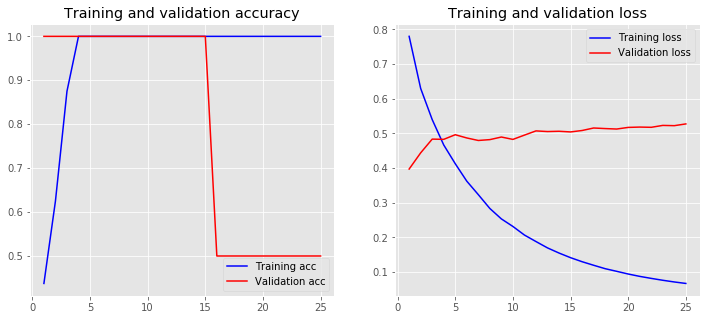

In [130]:
loss, accuracy = model.evaluate( X_test, y_test, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history)
print('Accuracy: %f' % (accuracy*100))
print('loss: %f' % (loss*100))

In [131]:
#Predict new data :
new_comment= ['horrible ,pathetic president']
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index) + 1
embedded_new_comment = word_tokenizer.texts_to_sequences(new_comment)
padded = pad_sequences(embedded_new_comment,length_long_sentence, padding='post')
pred = model.predict(padded)
print(pred)
print('#labels :0==> abusive/negative comments,number <0.5  we have abusive comments' )

[[0.15656292]]
#labels :0==> abusive/negative comments,number <0.5  we have abusive comments


In [132]:
#hybrid CNN-LSTM:
#Convolutional neural networks have been found to work well with text data ,the CNN Model for feature extraction 
#LSTM Model for interpreting the features across time steps.
from keras.layers import Embedding
from keras.layers import Dense, Input
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model
from keras.layers import Dense, Activation, Multiply, Add, LSTM, LeakyReLU
from keras.layers import Input, Dense, Dropout
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
model2 = tf.keras.Sequential()
model2.add(layers.Embedding(vocab_length, 100, weights=[embedding_matrix], input_length=length_long_sentence, trainable=True))

model2.add(layers.Conv1D(100, 5, activation='relu'))
model2.add(layers.MaxPooling1D(pool_size=4))
model2.add(layers.LSTM(128))
model2.add(layers.Dense(1, activation='sigmoid'))
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
print(model2.summary())

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_17 (Embedding)     (None, 9, 100)            5600      
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 5, 100)            50100     
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 1, 100)            0         
_________________________________________________________________
lstm_10 (LSTM)               (None, 128)               117248    
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 129       
Total params: 173,077
Trainable params: 173,077
Non-trainable params: 0
_________________________________________________________________
None


In [133]:
history2 = model2.fit(X_train, y_train, batch_size=2, epochs=25, verbose=1, validation_split=0.1)

Train on 16 samples, validate on 2 samples
Epoch 1/25
16/16 [==============================] - 10s 626ms/sample - loss: 0.7795 - acc: 0.3750 - val_loss: 0.8821 - val_acc: 0.0000e+00
Epoch 2/25
16/16 [==============================] - 0s 7ms/sample - loss: 0.6186 - acc: 0.6250 - val_loss: 0.7236 - val_acc: 0.0000e+00
Epoch 3/25
16/16 [==============================] - 0s 7ms/sample - loss: 0.5532 - acc: 1.0000 - val_loss: 0.6607 - val_acc: 1.0000
Epoch 4/25
16/16 [==============================] - 0s 7ms/sample - loss: 0.4183 - acc: 1.0000 - val_loss: 0.6796 - val_acc: 0.5000
Epoch 5/25
16/16 [==============================] - 0s 6ms/sample - loss: 0.2314 - acc: 1.0000 - val_loss: 0.6627 - val_acc: 0.5000
Epoch 6/25
16/16 [==============================] - 0s 6ms/sample - loss: 0.0835 - acc: 1.0000 - val_loss: 0.4716 - val_acc: 1.0000
Epoch 7/25
16/16 [==============================] - 0s 6ms/sample - loss: 0.0215 - acc: 1.0000 - val_loss: 0.4643 - val_acc: 1.0000
Epoch 8/25
16/16 [====

Accuracy: 100.000000
loss: 22.122148


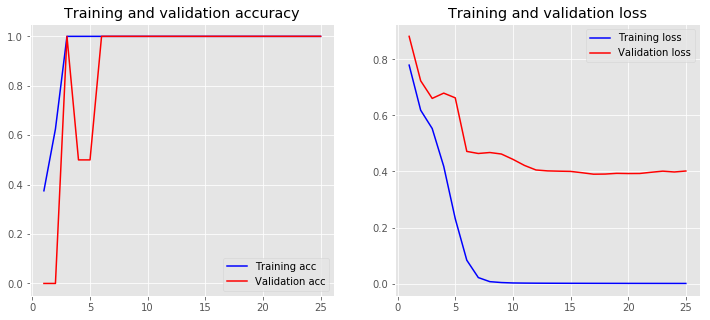

In [134]:
loss2, accuracy2 = model2.evaluate( X_test, y_test, verbose=0)
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
plot_history(history2)
print('Accuracy: %f' % (accuracy2*100))
print('loss: %f' % (loss2*100))

In [135]:
#Predict new data :
new_comment= ['horrible ,pathetic president']
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(corpus)
vocab_length = len(word_tokenizer.word_index) + 1
embedded_new_comment = word_tokenizer.texts_to_sequences(new_comment)
padded = pad_sequences(embedded_new_comment,length_long_sentence, padding='post')
pred = model2.predict(padded)
print(pred)
print('#labels :0==> abusive/negative comments,number <0.5  we have abusive comments' )
# just with few data we have huge difference , cnn-lstm is better than mlp only in our case for abusive comments detection

[[0.00113322]]
#labels :0==> abusive/negative comments,number <0.5  we have abusive comments


In [141]:
from pymongo import MongoClient
import requests
import pandas as pd
import facebook    #sudo pip install facebook-sdk
from collections import Counter
from facepy import GraphAPI
import itertools

#collect data from public page in fb and store in mongoDB
##the access token should be stored as a string
facebook = connection.facebook
commen = facebook.comments
access = 'xmrZCgDLHfNoLwZC0fwxQdNEZCHhL7VXPKTVCQWStccZATKZAKHMa8YhQZDZD'

graph = GraphAPI(access)
page_id= 'https://www.facebook.com/rza.cha'
datas= graph.get(page_id+'/posts?fields=comments,created_time', page=True, retry=5)

In [ ]:
import json 
#create data base MDB
client = MongoClient('127.0.0.1', 27017)
db_name = 'abusive_reviews_comments'
# connect to the database
db = client[db_name]

# Decode the JSON from FB
datajson = json.loads(datas)
#insert the data into the mongoDB into a collection called abusive_search
#if abusive_search doesn't exist, it will be created.
db.abusive_search.insert(datajson)